In [10]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use("seaborn-v0_8")


In [11]:
ticker=["AAPL","JPM","PG","MSFT","C"]
for t in ticker:
    returns=yf.download(ticker,start="2024-11-28",end="2025-11-28",auto_adjust=False)['Adj Close']

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [12]:
returns.head()

Ticker,AAPL,C,JPM,MSFT,PG
Date,,,,,
2024-11-29,236.261444,68.956902,244.543274,420.359100,174.645844
2024-12-02,238.511261,69.462860,241.145218,427.824066,175.074493
2024-12-03,241.557480,69.492050,239.744843,428.042419,170.904678
2024-12-04,241.915878,69.569893,238.354263,434.216888,170.602661
2024-12-05,241.945709,70.280182,240.391159,439.378784,171.498978


In [13]:

# STANDARDIZING RETURNS
scaler = StandardScaler()
returns_std = scaler.fit_transform(returns)

# Converting back to DataFrame
returns_std_df = pd.DataFrame(returns_std, index=returns.index, columns=returns.columns)
returns_std_df.head()


Ticker,AAPL,C,JPM,MSFT,PG
Date,,,,,
2024-11-29,0.309648,-1.031268,-0.920409,-0.744969,2.374622
2024-12-02,0.406379,-0.992016,-1.040434,-0.598920,2.438208
2024-12-03,0.537351,-0.989751,-1.089897,-0.594648,1.819649
2024-12-04,0.552760,-0.983712,-1.139014,-0.473847,1.774847
2024-12-05,0.554043,-0.928607,-1.067068,-0.372857,1.907809


In [14]:

#PCA


pca = PCA()
pca.fit(returns_std_df)

# Explained variance ratios
explained_var = pca.explained_variance_ratio_
explained_var


array([0.75095256, 0.15742838, 0.06320376, 0.02547061, 0.00294469])

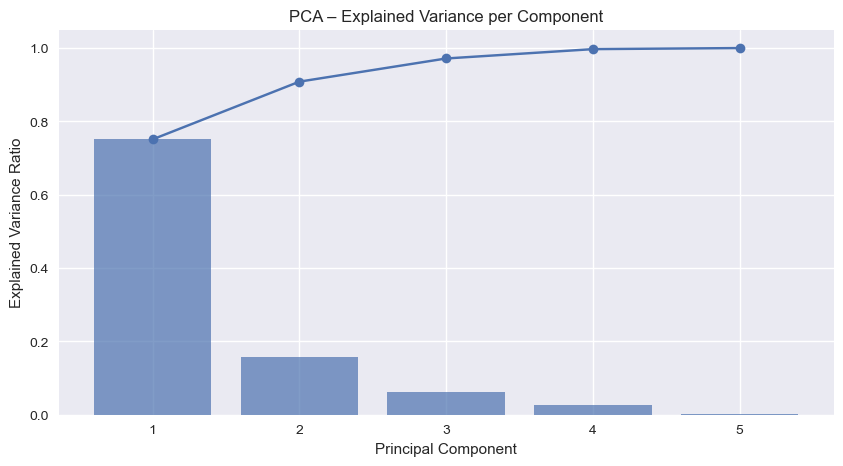

In [15]:


plt.figure(figsize=(10,5))
plt.bar(range(1, len(explained_var)+1), explained_var, alpha=0.7)
plt.plot(range(1, len(explained_var)+1), np.cumsum(explained_var), marker='o')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA – Explained Variance per Component")
plt.grid(True)
plt.show()


In [16]:

#FACTOR LOADINGS (Eigenvectors)
# ============================================
# Each column = PC, each row = asset weight in that PC (eigenportfolio)

loadings = pd.DataFrame(
    pca.components_.T,
    index=returns.columns,
    columns=[f"PC{i+1}" for i in range(len(returns.columns))]
)

loadings.head()


# FACTOR RETURNS
# factor_return_t = Σ (asset_return_t × loading)


factor_returns = returns_std_df @ loadings.iloc[:, :5]  # first 5 PCs
factor_returns.tail()


,PC1,PC2,PC3,PC4,PC5
Date,,,,,
2025-11-20,2.414162,0.936016,-0.831816,-0.318147,0.032335
2025-11-21,2.279429,1.278407,-0.528760,-0.399570,0.088870
2025-11-24,2.645589,1.306523,-1.027359,-0.367834,0.114611
2025-11-25,2.734236,1.371788,-0.741160,-0.437689,0.081420
2025-11-26,2.969325,1.328530,-0.650770,-0.417091,0.044211


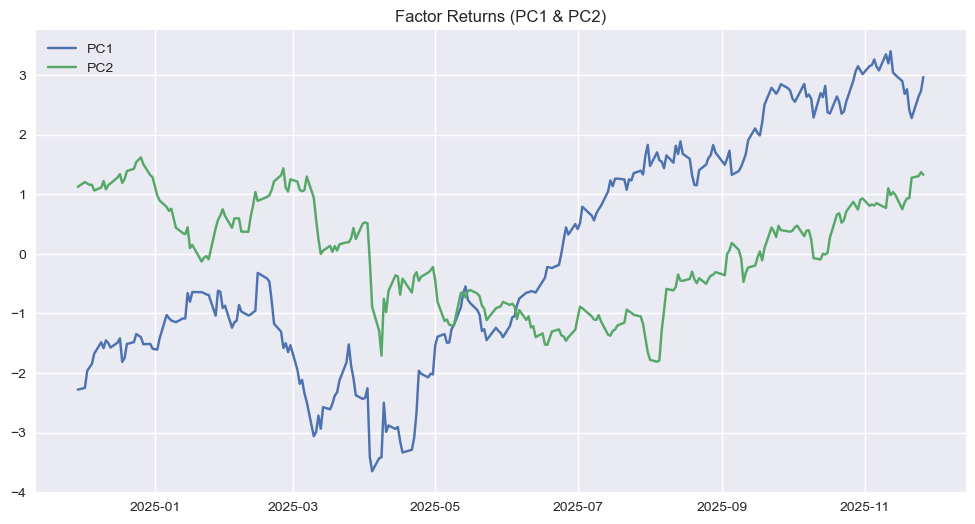

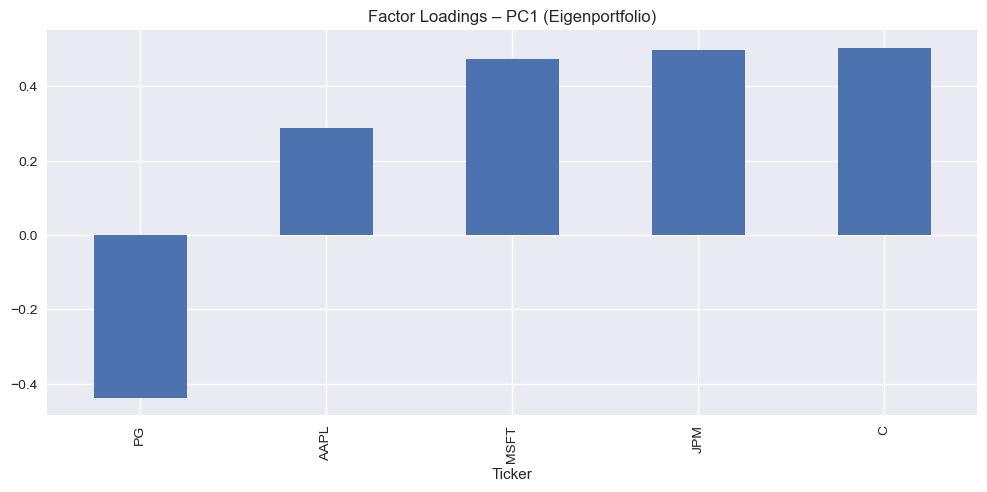

In [17]:

# FIRST FEW FACTOR RETURNS


plt.figure(figsize=(12,6))
plt.plot(factor_returns.iloc[:, 0], label="PC1")
plt.plot(factor_returns.iloc[:, 1], label="PC2")
plt.title("Factor Returns (PC1 & PC2)")
plt.legend()
plt.grid(True)
plt.show()

#FACTOR LOADINGS FOR FIRST PC

plt.figure(figsize=(12,5))
loadings["PC1"].sort_values().plot(kind="bar")
plt.title("Factor Loadings – PC1 (Eigenportfolio)")
plt.grid(True)
plt.show()

In [18]:
cum_exp = np.cumsum(explained_var)
n_factors = np.argmax(cum_exp >= 0.80) + 1
print("Number of Factors explaining 80% variance:", n_factors)

Number of Factors explaining 80% variance: 2
